In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import pandas as pd
import datetime as dt
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)
results = session.query(Measurement.date, Measurement.prcp).all()

# reflect the tables
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.head


C:\Users\steph\AppData\Local\Temp\ipykernel_11672\524068671.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


<bound method NDFrame.head of                   date  precipitation
date                                 
2010-01-01  2010-01-01           0.08
2010-01-01  2010-01-01           0.21
2010-01-01  2010-01-01           0.15
2010-01-01  2010-01-01           0.15
2010-01-01  2010-01-01           0.05
...                ...            ...
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.00
2017-08-23  2017-08-23           0.08
2017-08-23  2017-08-23           0.45

[19550 rows x 2 columns]>

In [5]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

,date,precipitation
date,,
2010-01-01,2010-01-01,0.08
2010-01-01,2010-01-01,0.21
2010-01-01,2010-01-01,0.15
2010-01-01,2010-01-01,0.15
2010-01-01,2010-01-01,0.05


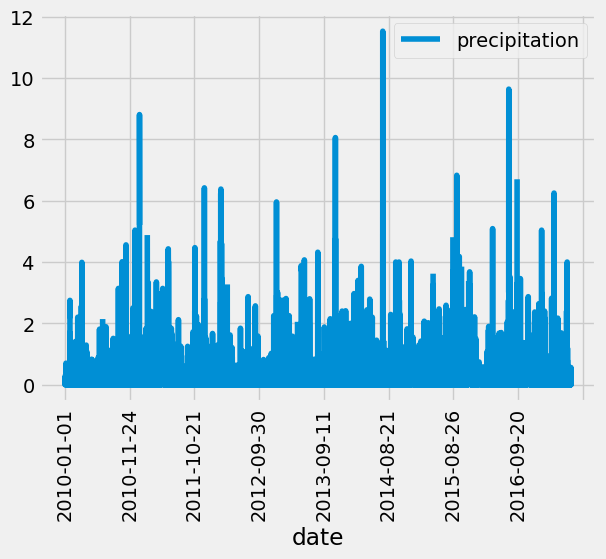

In [7]:
session = Session(engine)
results = session.query(Measurement.date, Measurement.prcp).all()
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()
df.plot(rot=90)
df.head()

# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date = dt.datetime.strptime(most_recent_date, '%Y-%m-%d')


# reflect the tables
most_recent_date


datetime.datetime(2017, 8, 23, 0, 0)

<AxesSubplot:xlabel='date'>

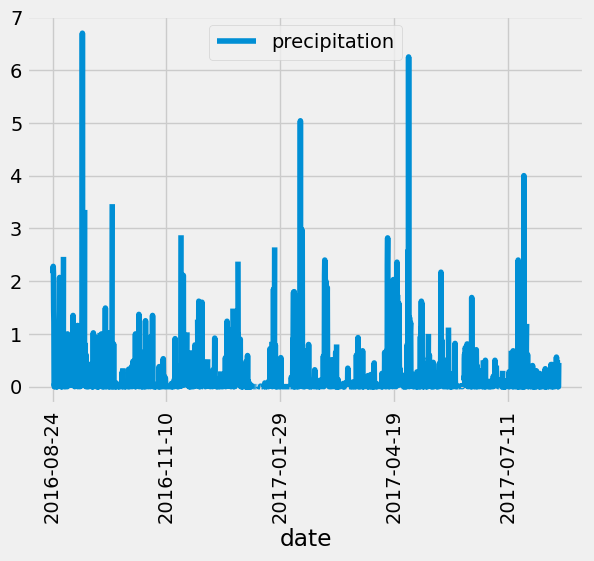

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(func.max(Measurement.date)).scalar()
latest_date = dt.datetime.strptime(latest_date, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = latest_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df = df.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)

In [10]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['precipitation'].describe()
print(summary_statistics)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and their counts in descending order.
for station, count in most_active_stations:
    print(f"{station}: {count}")

USC00519281: 2772
USC00519397: 2724
USC00513117: 2709
USC00519523: 2669
USC00516128: 2612
USC00514830: 2202
USC00511918: 1979
USC00517948: 1372
USC00518838: 511


In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active_station_id = most_active_station[0]

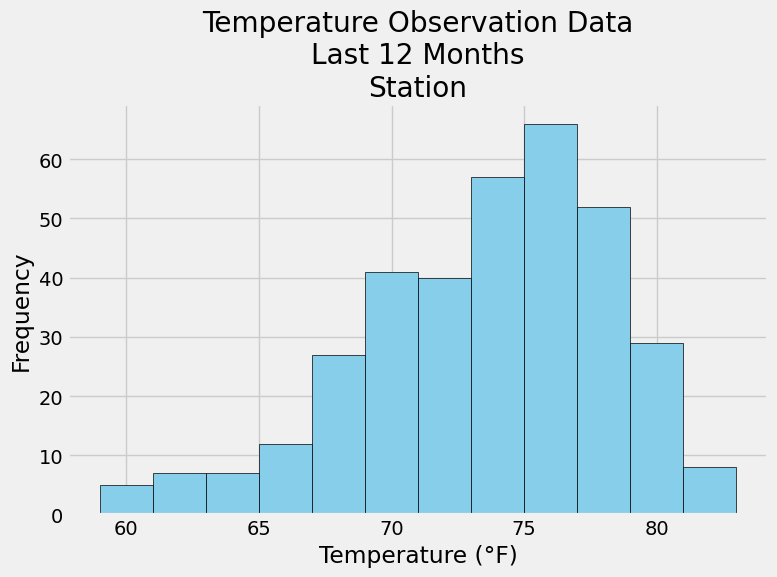

In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == most_active_station_id, Measurement.date >= one_year_ago).all()
df = pd.DataFrame(results, columns=['tobs'])
plt.figure(figsize=(8, 6))
plt.hist(df['tobs'], bins=12, color='skyblue', edgecolor='black')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title(f'Temperature Observation Data\nLast 12 Months\nStation')
plt.tight_layout()
plt.show()


# Close Session

In [15]:
# Close Session
session.close()